In [2]:
import numpy as np
import matplotlib.pyplot as plt


m=0.485
c=0.100
p_tails=0.4  
a=0.5
b=5.0
A=a+b-(b*m)/c
B=a+b+(b*m)/c

m,c,a,b,A,B

(0.485, 0.1, 0.5, 5.0, -18.749999999999996, 29.749999999999996)

In [78]:
#points where the function changes expression (pdf, cdf)
sep1 = m-c
sep2 = m
sep3 = m+c

#points where the quantile function changes expression
sp1 = a*sep1
sp2 = a*sep1 + A*(sep2-sep1) + b/c*0.5*(sep2**2-sep1**2)
sp3 = a*sep1 + A*(sep2-sep1) + b/c*0.5*(sep2**2-sep1**2) + B*(sep3-sep2) - b/c*0.5*(sep3**2-sep2**2)




def pdf(t):
    if t < sep1:
        return a
    elif t < sep2:
        return A + b/c * t
    elif t < sep3:
        return B - b/c * t
    else:
        return a
    
def cdf(t):
    cdf = 0
    if t < sep1:
        return a*t
    if t < sep2:
        return a*sep1 + A*(t-sep1) + b/c*0.5*(t**2-sep1**2)
    if t < sep3:
        return a*sep1 + A*(sep2-sep1) + b/c*0.5*(sep2**2-sep1**2) + B*(t-sep2) - b/c*0.5*(t**2-sep2**2)
    else:
        return  a*sep1 + A*(sep2-sep1) + b/c*0.5*(sep2**2-sep1**2) + B*(sep3-sep2) - b/c*0.5*(sep3**2-sep2**2) + a*(t-sep3)
    
    
def quantile(F):
    if F < sp1:
        return F/a
    if F < sp2:
        alpha = b/c*0.5
        beta = A
        gamma = -F +( a*sep1 - A*sep1  - b/c*0.5* sep1**2)
        return -beta*0.5/alpha + np.sqrt(( beta*0.5/alpha)**2 - gamma/alpha)
#         return 0.55
    if F < sp3:
        alpha =  - b/c*0.5
        beta = B
        gamma = -F + a*sep1 + A*(sep2-sep1) + b/c*0.5*(sep2**2-sep1**2) - B*sep2 + b/c*0.5* sep2**2
        return -beta*0.5/alpha - np.sqrt(( beta*0.5/alpha)**2 - gamma/alpha)
#         return 0.55
    else:
        return (F - (a*sep1 + A*(sep2-sep1) + b/c*0.5*(sep2**2-sep1**2) + B*(sep3-sep2) - b/c*0.5*(sep3**2-sep2**2) - a*sep3))/a

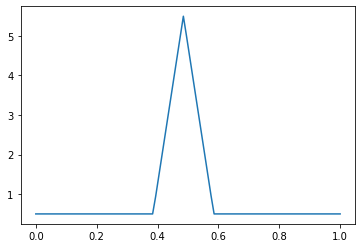

In [79]:
v = np.linspace(0,1,100)
v.shape
pdf_values = np.array([pdf(vi) for vi in v])
plt.plot(v,pdf_values)

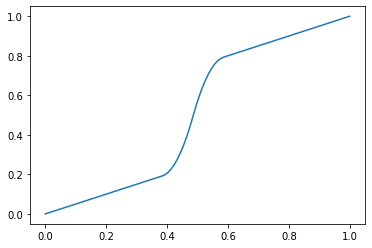

In [80]:

cdf_values = np.array([cdf(vi) for vi in v])
plt.plot(v,cdf_values)

In [81]:
n = 10000
rands = np.random.rand(n)
rands.shape
rands_dist = np.array([quantile(F) for F in rands])

In [82]:
rands_dist

array([0.73352875, 0.81150697, 0.43484914, ..., 0.72308767, 0.81861936,
       0.40998064])

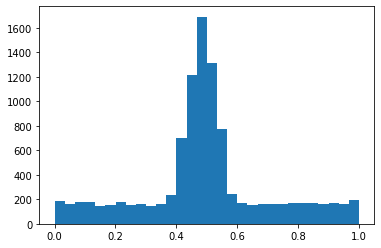

In [83]:
plt.hist(rands_dist, bins=30, histtype='stepfilled')
plt.show()

In [84]:
a*sep1 + A*(sep2-sep1) + b/c*0.5*(sep2**2-sep1**2) + B*(sep3-sep2) - b/c*0.5*(sep3**2-sep2**2) + a*(1-sep3)

1.0000000000000009